In [4]:
!pip install yfinance

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
ticker = "TSLA"
df = yf.download(ticker, period="max")
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


In [8]:
df.drop(['Date', 'Adj Close'], axis = 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10196\553308113.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
0,1.592667,1.666667,1.169333,1.266667,281494500
1,1.588667,2.028000,1.553333,1.719333,257806500
2,1.464000,1.728000,1.351333,1.666667,123282000
3,1.280000,1.540000,1.247333,1.533333,77097000
4,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...
3620,311.179993,329.980011,310.369995,327.690002,120726100
3621,320.720001,324.679993,309.220001,310.570007,114440300
3622,338.739990,348.549988,330.010010,340.730011,126547500


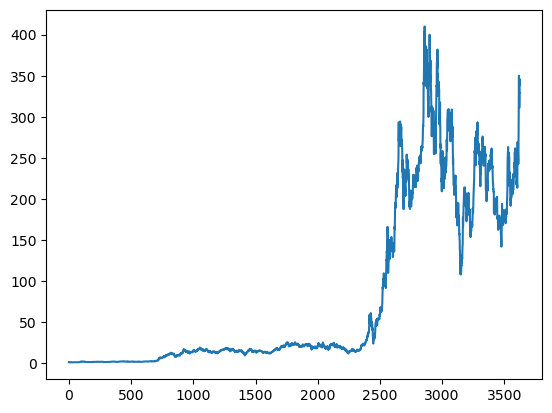

In [13]:
plt.plot(df.Close)

In [14]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

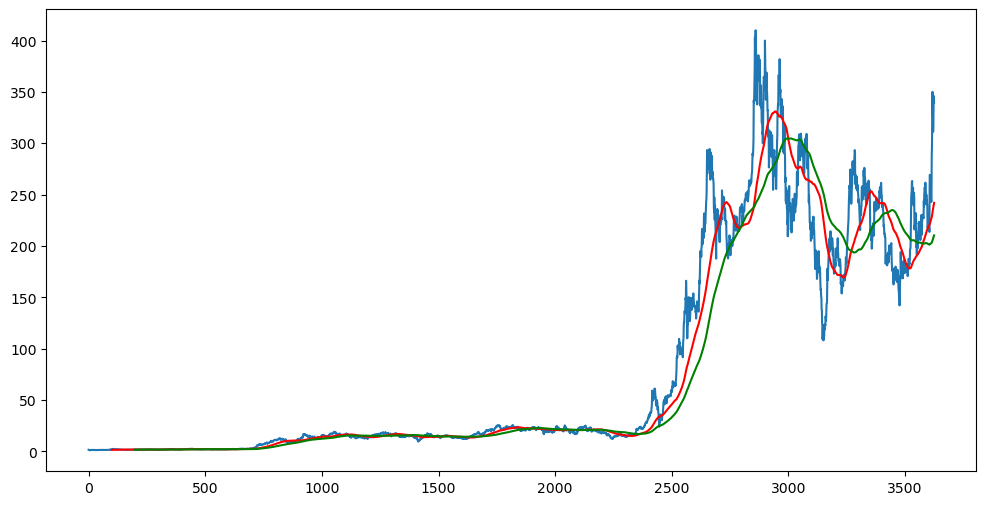

In [15]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r') 
plt.plot(ma200, 'g')

In [16]:
df.shape

(3625, 7)

In [18]:
train = pd.DataFrame(df['Close'][:int(len(df)*0.70)])
test = pd.DataFrame(df['Close'][int(len(df)*0.70):])

In [19]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [20]:
train_arr = scaler.fit_transform(train)
train_arr

array([[0.00497174],
       [0.00493486],
       [0.00378565],
       ...,
       [0.92015116],
       [0.86111112],
       [0.93645526]])

In [21]:
X_train = []
Y_train = []
for i in range(100, train_arr.shape[0]):
    X_train.append(train_arr[i-100:i])
    Y_train.append(train_arr[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, Y_train, epochs = 50)

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 49s 323ms/step - loss: 0.0103
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 24s 310ms/step - loss: 0.0022
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 24s 315ms/step - loss: 0.0018
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 24s 316ms/step - loss: 0.0022
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 25s 322ms/step - loss: 0.0016
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 25s 325ms/step - loss: 0.0021
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 25s 319ms/step - loss: 0.0016
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 25s 321ms/step - loss: 0.0013
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 25s 324ms/step - loss: 0.0014
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 25s 328ms/step - loss: 0.0015
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 330ms/step - loss: 0.0015
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 25s 329ms/step - loss: 0.0017
Epoch 13/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 334ms/step - loss: 0.0013
Epoch 14/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 25s 323ms/step - loss: 0.0012
Epoch 15/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 

In [26]:
model.save('keras_model.h5')

In [49]:
prev100 = train.tail(100)

In [50]:
final_df = pd.concat([prev100, test], ignore_index = True)

In [51]:
input_data = scaler.fit_transform(final_df)

In [52]:
input_data.shape

(1188, 1)

In [53]:
X_test = []
Y_test = []
for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    Y_test.append(input_data[i, 0])

X_test, Y_test = np.array(X_test), np.array(Y_test)

In [54]:
Y_predict = model.predict(X_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step


In [55]:
Y_predict

array([[0.20818493],
       [0.20756629],
       [0.2063126 ],
       ...,
       [0.81283593],
       [0.8181534 ],
       [0.8192231 ]], dtype=float32)

In [56]:
scaler.scale_

array([0.00259142])

In [57]:
scale_factor = scaler.scale_[0]
y_predict = Y_predict/scale_factor
y_test = Y_test/scale_factor

In [58]:
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"MSE: {mse}, MAE: {mae}, R2: {r2}")

MSE: 273.5433214201381, MAE: 12.676862267886891, R2: 0.9214577795664047


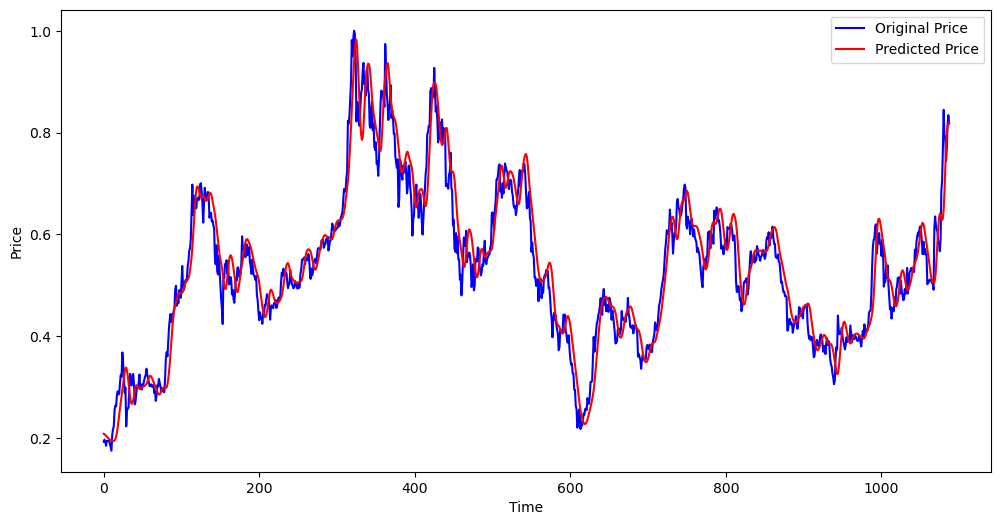

In [59]:
plt.figure(figsize=(12, 6))

plt.plot(Y_test, 'b', label = 'Original Price')
plt.plot(Y_predict, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()